Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise07/exercise07.ipynb)

# Exercise 7

## Problem

In week 7, you learned how to extend tabular data with geospatial information: points, linestrings, and polygons.

For this next exercise, please ask a planning-related question with a spatial component, then find data and apply any data science methods you have learned so-far (or can Google!) to answer that question.

## Data

You are welcome to use any data you would like, including data used in previous demos and exercises.

## A Few Pointers
- Choose a straightforward question that requires a reasonable amount of data! Don't shoot for the moon. This exercise is intended to give you a chance to practice finding and analyzing spatial data, not to address the world's greatest challenges.
- Consider using this exercise to get a head start on your final project or explore options for it. Your project doesn't need to focus on spatial analysis for it to play a role. Are there datasets you might join together based on spatial locations?
- Don't go overboard. If you're hitting a wall with coding, write pseudocode and turn that in. Don't let the perfect be the enemy of the done. But if you're energized and having fun by chasing down a thorny solution to a coding problem, by all means feel free to keep at it!



In [ ]:
# I did download everything on my laptop to run Python locally, but I actually kind of like Colab, so
# I decided to do the assignment online again.

# Anyway, I took advantage of this assignment to start looking into the data I want to use for my final project
# (about public housing and the Black population in PG County). My code creates two main results:

# (1) The function 'map_tracts(status)' returns a map that has public housing projects (not units) as a series of points
# over a 'base' map of Prince George's County's Black/African American population by Census tract. I wanted to do this to
# see if there was an obvious County-wide pattern between high concentrations of Black Prince Georgians and public housing.
# For the final version of this, I think I'll need to better factor in the relatively recent influx of Latinx
# people into northwest PG County.

# (2) The function 'info_for_tract(tract, status) returns the number of public housing units (not projects) and
# Black/African American population percentage for a specific Census tract. It's more helpful for getting data on a specfic
# Census tract than looking at the issue County-wide, but something like this could be helpful in my final project to
# directly compare certain Census tracts in PG County.

In [1]:
# Import everything we need:
import os
import pandas as pd
import geopandas as gpd

In [2]:
# SKIP THIS CELL WHEN RUNNING

# Mount Google Drive:
from google.colab import drive
drive.mount('/content/drive')

# Set the working directory:
os.chdir('/content/drive/MyDrive/Sanford URSP688Y spring 24/Exercises/exercise07_sanford')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import the module where most of the code is stored:
import exercise07_module_sanford

In [4]:
# Import required data:
housing_projects = pd.read_csv('PG_county_public_housing.csv')
tracts = gpd.read_file('PGCountyCensusTracts.geojson')
race_data = pd.read_csv('PG_county_race_data.csv')

# NOTES ON DATA SOURCES:
# Public housing data (PG_county_public_housing.csv) pulled from https://nhpd.preservationdatabase.org/data
# Demographic data (PG_county_race_data.csv) pulled from https://data.census.gov/table?q=DP05&g=050XX00US24033$1400000&y=2022
# Census tracts (PGCountyCensusTracts.geojson) pulled from https://censusreporter.org/data/table/?table=B01003&geo_ids=05000US24033,140|05000US24033&primary_geo_id=05000US24033

<Axes: >

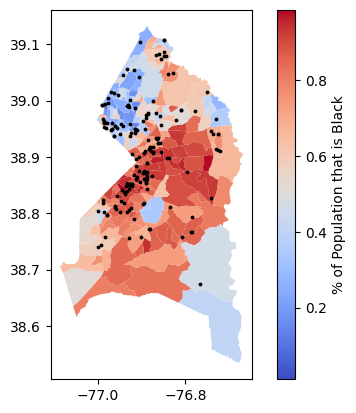

In [5]:
# This is the function that creates the map.
# You can replace 'all' with another status -- active, inactive, or inconclusive -- if you only want to see
# public housing projects of that nature. 'Active' is likely the most helpful, although one could also
# do an historical analysis using the 'inactive' status.

exercise07_module_sanford.map_tracts('all')

In [6]:
# This is the function that gives the number of public housing units and Black/African American population
# percentage for the chosen tract. You can replace the tract with another PG County tract and/or replace 'active'
# with another valid status if you want to test the function.

exercise07_module_sanford.info_for_tract(8002.06, 'active')

# USER NOTES: You have to input the tract with the proper amount of decimal points (2, i.e. 8075.00) in order
# to get a useful answer. If you want, you can explore a list of valid entries by calling the function
# 'join_housing_to_tracts(status)' from the associated .py file and searching the resulting geodataframe for tract numbers.

'Tract 8002.06 has 58 active public housing unit(s). Its population is 75.9% Black or African American.'